# 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

Primero definimos una función que procesa la imagen y devuelve sus coordenadas cromáticas.

In [3]:
import numpy as np 

def calculate_chromaticity_coordinates(img):
    # Convertir la imagen a float32
    img = img.astype(np.float32)

    # Calcular la suma de los canales de color
    sum_color = np.sum(img, axis=2) + 1e-6  # Agregar una pequeña constante para evitar la división por cero

    # Crear una máscara para los píxeles donde la suma de los canales de color es 0
    mask = sum_color != 0

    # Calcular las coordenadas cromáticas
    chromaticity_coordinates = np.zeros(img.shape)
    chromaticity_coordinates[:,:,0] = np.where(mask, img[:,:,0] / sum_color, 0)
    chromaticity_coordinates[:,:,1] = np.where(mask, img[:,:,1] / sum_color, 0)
    chromaticity_coordinates[:,:,2] = np.where(mask, img[:,:,2] / sum_color, 0)

    return chromaticity_coordinates

In [10]:
import cv2

# Cargar la imagen
img = cv2.imread('./coord_cromaticas/CoordCrom_1.png')

# Llamar a la función para calcular las coordenadas cromáticas
chromaticity_coordinates = calculate_chromaticity_coordinates(img)
chromaticity_coordinates

array([[[0.28415301, 0.30601093, 0.40983605],
        [0.28921568, 0.30882353, 0.40196079],
        [0.28787878, 0.30808082, 0.4040404 ],
        ...,
        [0.33557048, 0.30201343, 0.36241612],
        [0.33557048, 0.30201343, 0.36241612],
        [0.33552632, 0.30263159, 0.3618421 ]],

       [[0.28921568, 0.30882353, 0.40196079],
        [0.28645834, 0.30729166, 0.40625   ],
        [0.28921568, 0.30882353, 0.40196079],
        ...,
        [0.33557048, 0.30201343, 0.36241612],
        [0.33557048, 0.30201343, 0.36241612],
        [0.33566433, 0.30069929, 0.36363637]],

       [[0.29064038, 0.31034482, 0.39901477],
        [0.29126215, 0.31067961, 0.39805827],
        [0.2885572 , 0.3084577 , 0.40298507],
        ...,
        [0.33557048, 0.30201343, 0.36241612],
        [0.33566433, 0.30069929, 0.36363637],
        [0.33557048, 0.30201343, 0.36241612]],

       ...,

       [[0.11111111, 0.27777779, 0.6111111 ],
        [0.12      , 0.28      , 0.60000002],
        [0.11111111, 0

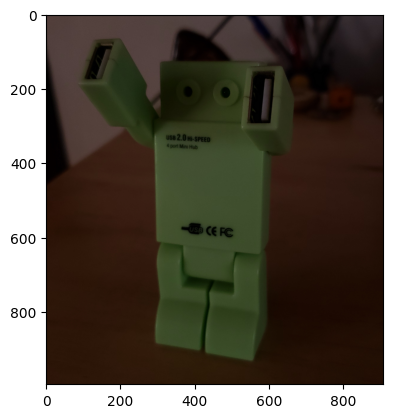

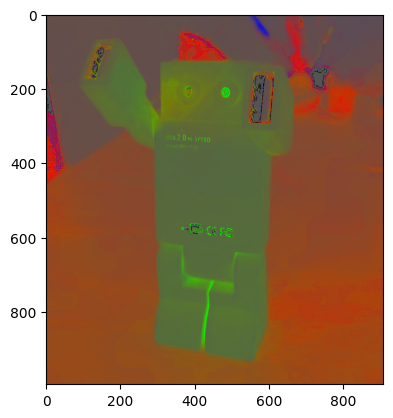

In [11]:
# Mostrar la imagen de las coordenadas cromáticas
import matplotlib.pyplot as plt

# Normalizar los valores al rango 0-255 para mostrar la imagen
normalized_img = (chromaticity_coordinates * 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))
plt.show()

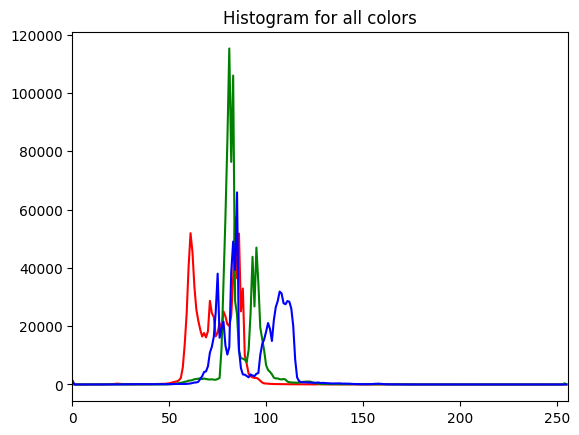

In [7]:
# Crear histogramas de las coordenadas cromáticas
plt.figure()
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    # Normalizar los datos al rango 0-255 y convertir a uint8
    data = (chromaticity_coordinates[:,:,i] * 255).astype('uint8')
    histogram = cv2.calcHist([data], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)

plt.xlim([0, 256])
plt.title('Histogram for all colors')
plt.show()